1. Discuss 2 Machine Learning loss function outside of the ones discussed in the classroom. Describe loss equations, convexity, pros and cons, and applications or links to research.

Answer: 

a. One of the loss functions that we did not discuss in class is Mean Bias Error. This loss is pretty similar to MSE, but unlike MSE Mean Bias Error does not take the absolute value. As for the pros of this loss function, is that  it could determine if there is positive or negative bias in the model however we need to be really careful when interpreting because positive and negative errors will cancel out. As for the cons of this model, the model is less accurate in practice.
    
The Mean Bias Error Equation is:

\begin{equation}
MBE = \frac{\sum_{i=1}^{n}(y_i - y_p)}{n}
\end{equation}
   
The application of MBE is used to evaluate the forecast. For more details look at the following link: https://www.sciencedirect.com/topics/engineering/mean-bias-error

b. Another loss function that we did not discuss in class is called Mean Squared Logarithmic Error(MSLE). This loss function is a variation of MSE. We can use MSLE when doing regression, believing that our target,is normally distributed, and we don’t want large errors to be significantly more penalized than small ones.The loss can be interpreted as a measure of the ratio between the true and predicted value. The pros of this loss function is that large errors are not penalized as heavy as using MSE, since is a ration between true and predicted value. The cons of this loss function is that is harder to compute since it need the logarithmic function for both the predicted value and the actual value to come up with an answer.

The MSLE equation is:

\begin{equation}
MSLE = \frac{\sum_{i=0}^{n}(log(y_i + 1) - (log (y_p + 1))^2}{n}
\end{equation}

The application of Mean Squared Logarithmic Error could be applied to predicting station level demand in a bike-sharing system using recurrent neural networks

In [1]:
import numpy as np

In [2]:
def PCA_calculation(data_mat):
    Data = np.array(data_mat)
    Data= np.mat(Data)
    mean_values= Data.mean(axis=0)
    A = Data - mean_values
    C = np.cov(A, rowvar=0)
    eigen_values, eigen_vectors = np.linalg.eig(C)
    print("Eigen Values:", eigen_values, "\n")
    print("Eigen Vectors:\n", eigen_vectors)
    new_columns = eigen_vectors.T
    X_Final_Result = np.dot(new_columns, A.T)
    print("The Projected Data:",X_Final_Result.T)
    

4. For the Breast Cancer Wisconsin Dataset:

    1. Apply dimensionality reduction (Use the PCA function developed in #3)
    2. Use a Logistic Regression and Decision Tree classifier to Predict the Diagnosis (M = malignant, B = benign) by        splitting the data into train and test

    3. Compare the performance of algorithms using following metrics
        a. Accuracy Score
        b. Confusion Matrix
        c. ROC Curve
        d. Precision Recall curves
    4. Which model and set of metrics are best suited for this dataset and why?

In [3]:
import pandas as pd
data_trial = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)
data_trial.columns=['ID', 'Type_of_Cancer', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v30']



In [4]:
data_trial.head(5)

,ID,Type_of_Cancer,v1,v2,v3,v4,v5,v6,v7,v8,...,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# So I will first take out the first two columns since the first one is ID, and the second one is my Y predictor.
PCA_Data = data_trial.drop(['ID', 'Type_of_Cancer'], axis=1)
PCA_Data.head(5)

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
PCA_calculation(PCA_Data)

Eigen Values: [4.43782605e+05 7.31010006e+03 7.03833742e+02 5.46487379e+01
 3.98900178e+01 3.00458768e+00 1.81533030e+00 3.71466740e-01
 1.55513547e-01 8.40612196e-02 3.16089533e-02 7.49736514e-03
 3.16165652e-03 2.16150395e-03 1.32653879e-03 6.40269304e-04
 3.74883320e-04 2.35169626e-04 1.84583467e-04 1.64180064e-04
 7.81102011e-05 5.76111660e-05 3.49172775e-05 2.83952689e-05
 1.61463677e-05 1.24902419e-05 7.01997261e-07 3.68048171e-06
 2.84790425e-06 2.00491564e-06] 

Eigen Vectors:
 [[ 5.08623202e-03  9.28705650e-03 -1.23425821e-02 -3.42380473e-02
  -3.54561138e-02 -1.31213101e-01  3.35131912e-02  7.54924585e-02
  -3.50549264e-01 -1.39559852e-01  4.19346972e-01 -7.35141931e-01
   2.18087182e-01  8.10260113e-02  1.37865559e-01  1.41957144e-01
  -4.42129324e-02 -8.97292328e-02 -2.10057742e-02 -8.01074429e-02
  -5.94747777e-02 -8.72363409e-03  4.57847381e-03  2.82894830e-02
  -3.59617411e-03  1.60336173e-03 -6.48447162e-04 -2.79341068e-03
  -3.25869730e-03  5.12865809e-04]
 [ 2.1965702

In [7]:
breast_canc_target = data_trial['Type_of_Cancer'] 
breast_canc_target.head()

0    M
1    M
2    M
3    M
4    M
Name: Type_of_Cancer, dtype: object

In [8]:
breast_can_var= PCA_Data

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(breast_can_var, breast_canc_target, test_size=0.2, random_state=50)

In [10]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 30)
(114, 30)
(455,)
(114,)


In [11]:
np.ravel(y_test)

array(['B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M',
       'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'M',
       'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'B'], dtype=object)

In [12]:
y_train_final = pd.get_dummies(y_train)
y_train_final.drop(columns='B', inplace=True)
y_train_final.head()
y_test_final = pd.get_dummies(y_test)
y_test_final.drop(columns='B', inplace=True)
y_test_final.head()

,M
356,0
556,0
283,1
495,0
364,0


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc

In [29]:
def fit_predict_score(name,clf):
    clf.fit(x_train, np.ravel(y_train_final))
    predicted = clf.predict(x_test)
    labels=[1, 0]
    cm =  metrics.confusion_matrix(y_test_final, predicted, labels)
    fig = plt.figure() 
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm) 
    ax.set_xticklabels([''] + labels) 
    ax.set_yticklabels([''] + labels) 
    fig.colorbar(cax) 
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    accuracy = np.round(metrics.accuracy_score(y_test_final , predicted),3)
    plt.title(name + " " + str(accuracy), fontsize = 15)
    plt.show()
    fpr, tpr, thresholds = roc_curve(y_test_final, clf.predict_proba(x_test)[:,1])
    result_roc_auc= roc_auc_score(y_test_final, clf.predict(x_test))
    plt.figure()
    plt.plot(fpr, tpr, marker='.', label=name+ " (Sensitivity -%0.3f)" % result_roc_auc)
    plt.plot([0,1],[0,1], 'r--')
    plt.xlim([-0.1, 1.0])
    plt.xlim([-0.1, 1.05])
    # Title
    plt.title('ROC Plot')
    # Axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # Show legend
    plt.legend() # 
    # Show plot
    plt.show()
    
    
    #Precision -Recall Curve in Python
    lr_precision, lr_recall, _ = precision_recall_curve(y_test_final, clf.predict_proba(x_test)[:, 1])
    lr_f1, lr_auc = f1_score(y_test_final, predicted), auc(lr_recall, lr_precision)
    # summarize scores
    print(name + 'f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
    # plot the precision-recall curves
    plt.plot(lr_recall, lr_precision, marker='.', label=name)
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()
    

/Users/elssieguerra/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


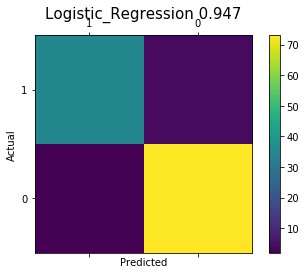

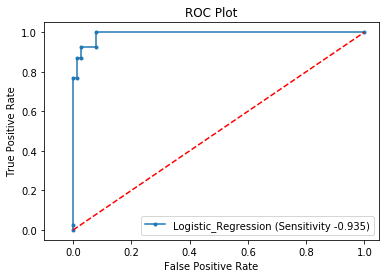

Logistic_Regressionf1=0.921 auc=0.983


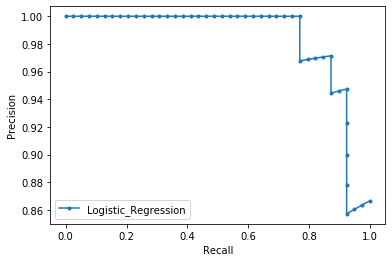

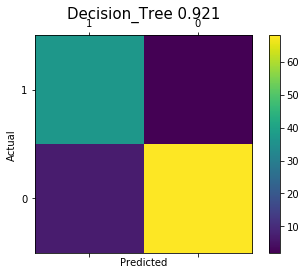

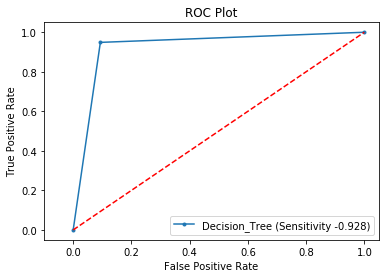

Decision_Treef1=0.892 auc=0.904


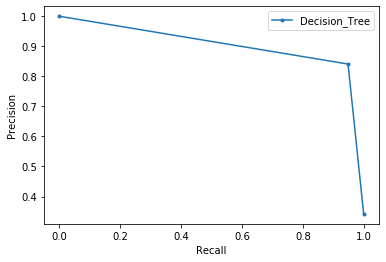

In [30]:

clf0= LogisticRegression()
clf1 = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=3)

names = ["Logistic_Regression", "Decision_Tree"]
classifiers = [clf0, clf1]

for name, clf in zip(names, classifiers):
    fit_predict_score(name,clf)

The Logistic Regression is the best model that is suited for this datase, due that it gave us a better Accuracy Score (0.947) in comparison to Decision Trees that had an accuracy of 0.921. Also the F1 Score in the Logistic Regression is higher than that of Decision Trees. For me, the most useful metric for this set of dataset is the Precision-Recall Curve due that is more appropiate for Imbalanced dataset, which in this time is the case. (See Value Count below)

In [37]:
The amount of Malign Cancer founds compared to Benign. (1= refers to Malignant, 0 refers to Benign)
y_test_final['M'].value_counts()

0    75
1    39
Name: M, dtype: int64